In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
customer_df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [209]:
#Activity 1

In [8]:
customer_df.shape
customer_df.head()


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [9]:
# Rename the columns so they follow the PE8 (snake case)

customer_df.columns = customer_df.columns.str.lower()
customer_df.columns 
customer_df.columns  = customer_df.columns.str.replace(' ','_')
customer_df.columns


Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [10]:
#Change effective to date column to datetime format

customer_df['effective_to_date']
customer_df['effective_to_date']= pd.to_datetime(customer_df['effective_to_date'])
customer_df['effective_to_date']

customer_df.dtypes



customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [32]:
#7 Define a function that differentiates between continuous and discrete variables.



def variable_check(df):
    discrete = []
    continuous = []
    categorical = []
    pattern = '[a-z]*'
    for column in df.columns:
        if df[column].dtype == 'int64' and len(df[column].unique())/len(df[column]) > 0.05 or df[column].dtype == 'float64'and len(df[column].unique())/len(df[column]) > 0.05 :
            continuous.append(column)
        elif df[column].dtype == 'int64' and len(df[column].unique())/len(df[column]) < 0.05 or df[column].dtype == 'float64'and len(df[column].unique())/len(df[column]) < 0.05:
            discrete.append(column)
        else:
            categorical.append(column)
    return  continuous, discrete, categorical

continuous,discrete,categorical = variable_check(customer_df)

print(continuous)
print(discrete)
print(categorical)





['customer_lifetime_value', 'income', 'total_claim_amount']
['monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']
['customer', 'state', 'response', 'coverage', 'education', 'effective_to_date', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']


In [37]:
#Assign them
#continuos

continuous_df = customer_df[continuous]

continuous_df.head()


,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879


In [36]:
#discrete
discrete_df = customer_df[discrete]

discrete_df.head()

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1


In [38]:
#categorical
categorical_df = customer_df[categorical]
categorical_df.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [42]:
#customer_id
# Since we dont have duplicates or NAN values ,I wuld drop it


categorical_df = categorical_df.drop(['customer'], axis = 1)

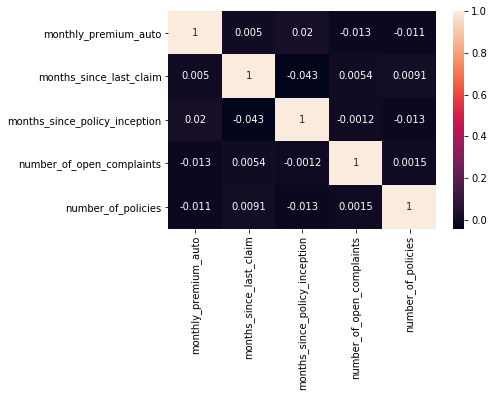

In [48]:
#Starting of lab 2

#corr_matrix_discrete


sns.heatmap(discrete_df.corr(), annot = True)
plt.show()


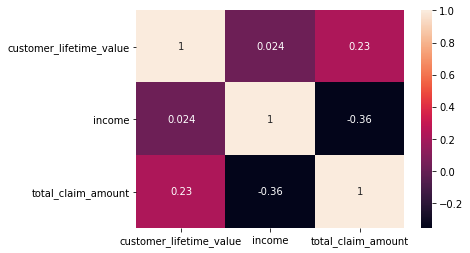

In [47]:
#corr_matrix_continuos
sns.heatmap(continuous_df.corr(), annot = True)
plt.show()

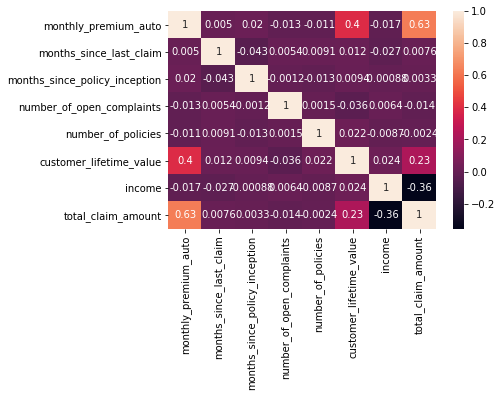

In [58]:
#total correlation numericals

numericals = pd.concat([discrete_df, continuous_df], axis =1)

sns.heatmap(numericals.corr(), annot = True)
plt.show()

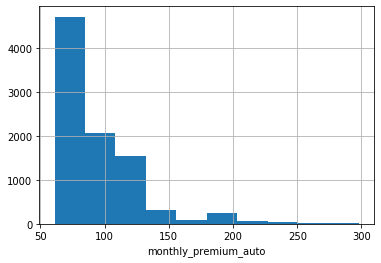

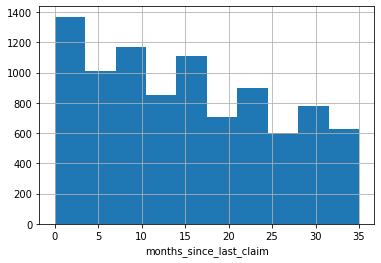

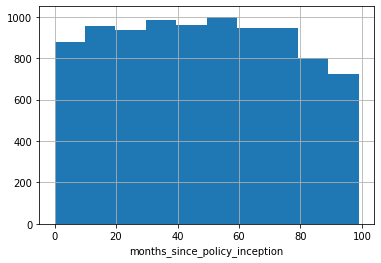

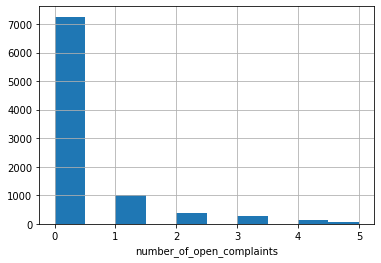

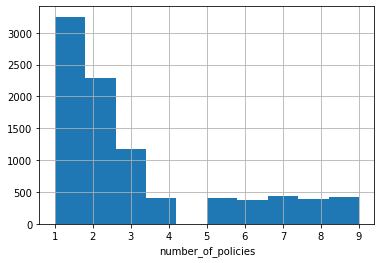

In [72]:
#4 Create a function to plot every discrete variables

for i in discrete_df.columns:
     discrete_df[i].hist()
     plt.xlabel(i)
     plt.show()
     


     
  


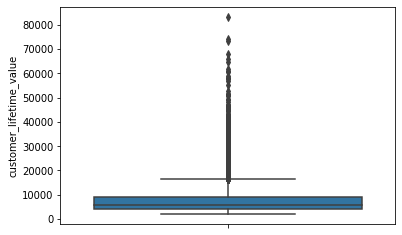

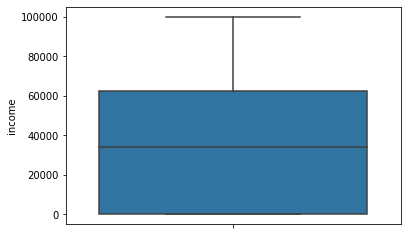

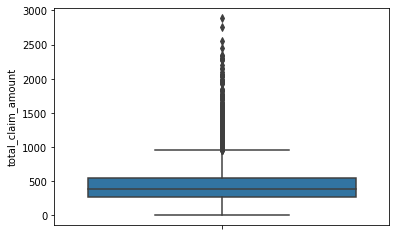

In [80]:
#Do the same with continuous variables

for i in continuous_df.columns:
     sns.boxplot(x=i, data=continuous_df, orient= "v")
     plt.show()

In [ ]:
#5 What can you see in the plots?


#At least 3 of the discrete variables are very skewed. To be transformed.
# Regarding the continuous one, instead, income has a very large variabilty in his interquartile range, while customer lifetime and total claim 
# amount have a relevant number of outliers and small variability talking about range and distribution.

In [220]:
#6 Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

#Done in 4


In [85]:
#7 Have you found outliers? If you have, what should we do with them?

# I found outliers in customer_lifetime_value and total_claim_amount. I wanna check how many they are.continuous_df
# Checking how many values will be removed if the outliers are removed

#Outliers customer_lifetime_value

iqr = np.percentile(continuous_df['customer_lifetime_value'],75) - np.percentile(continuous_df['customer_lifetime_value'],25)
upper_limit = np.percentile(continuous_df['customer_lifetime_value'],75) + 1.5*iqr
print(upper_limit)
extraordinary_points = continuous_df[continuous_df['customer_lifetime_value'] > upper_limit]
len(extraordinary_points)  

#817 OUTLIERS

16414.039911750002


817

In [86]:
#Outliers total_claim_amount

iqr = np.percentile(continuous_df['total_claim_amount'],75) - np.percentile(continuous_df['total_claim_amount'],25)
upper_limit = np.percentile(continuous_df['total_claim_amount'],75) + 1.5*iqr
print(upper_limit)
extraordinary_points = continuous_df[continuous_df['total_claim_amount'] > upper_limit]
len(extraordinary_points)

#453 OUTLIERS

960.3997301250002


453

In [90]:
#8 Check nan values per column

customer_df.isnull().sum()

# Nan are not present in the whole dataframe

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [223]:
# 9, 10 , 11, 12 done